In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X_data = adult.data.features
y_data = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [ ]:
X_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [ ]:
y_data

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [ ]:
df = pd.concat([X_data, y_data], axis=1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
df[df == '?'] = np.nan

In [ ]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df['income']=df['income'].map({'<=50K': '<=50K', '<50K': '<50K', '<=50K.': '<=50K', '<50K.': '<50K' , '>50K': '>50K', '>=50K': '>=50K', '>50K.': '>50K', '>=50K.': '>=50K'})

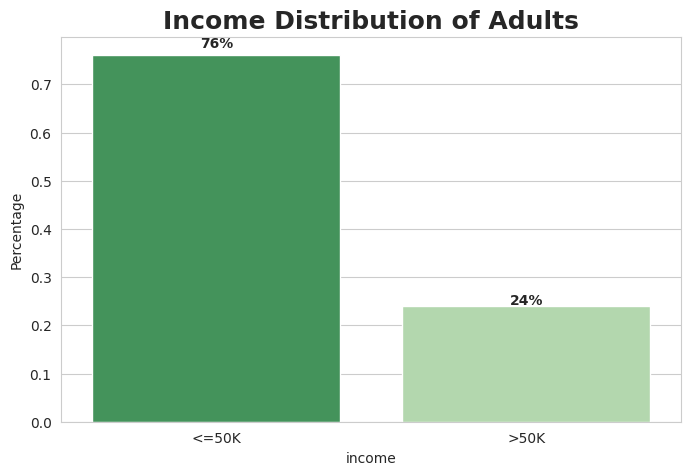

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [ ]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df_ai = df.copy()
df_ai['age_group'] = df_ai['age'].apply(age_group)

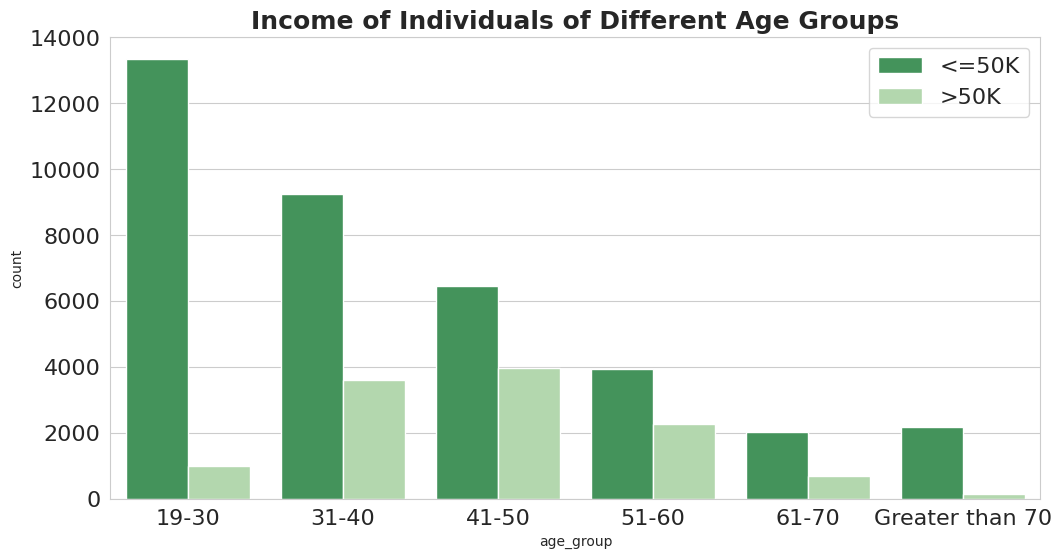

In [ ]:
df_ai = pd.melt(df_ai, id_vars=['age_group'], value_vars=['income'])
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
# sns.countplot(df_ai['age_group'], hue = df_ai['income'], palette='Greens_r', order = order_list)
sns.countplot(data=df_ai, x='age_group', hue='value', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

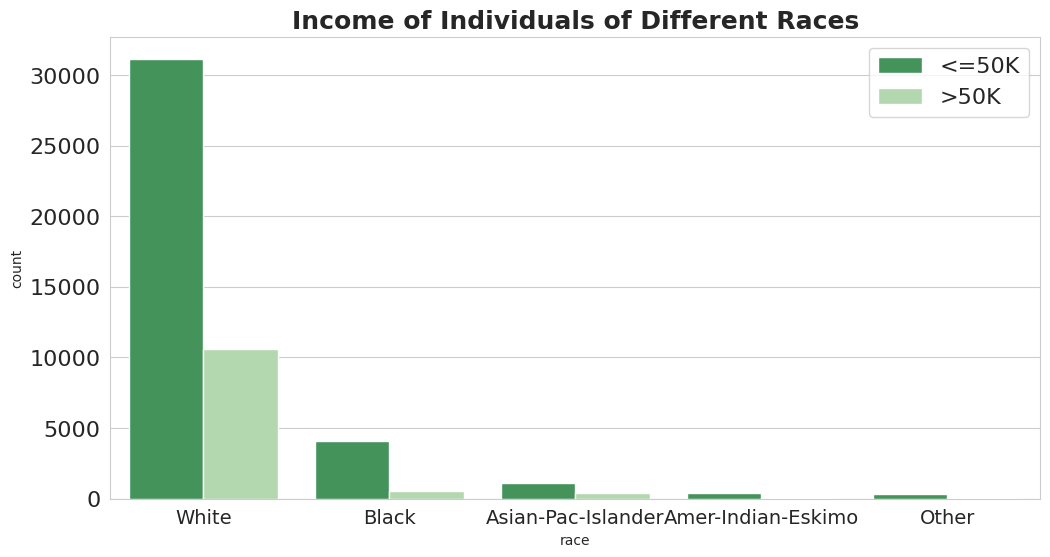

In [ ]:
df_ri = pd.melt(df, id_vars=['race'], value_vars=['income'])
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
# sns.countplot(df['race'], hue = df['income'], palette='Greens_r')
sns.countplot(data=df_ri, x='race', hue='value', palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

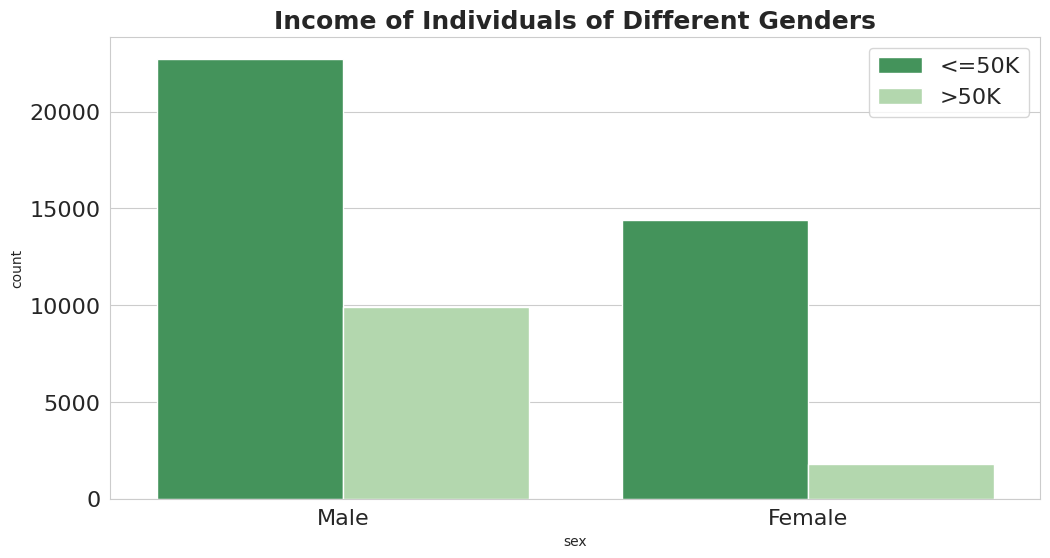

In [ ]:
df_si = pd.melt(df, id_vars=['sex'], value_vars=['income'])
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
# sns.countplot(df['sex'], hue = df['income'], palette='Greens_r')
sns.countplot(data=df_si, x='sex', hue='value', palette='Greens_r')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

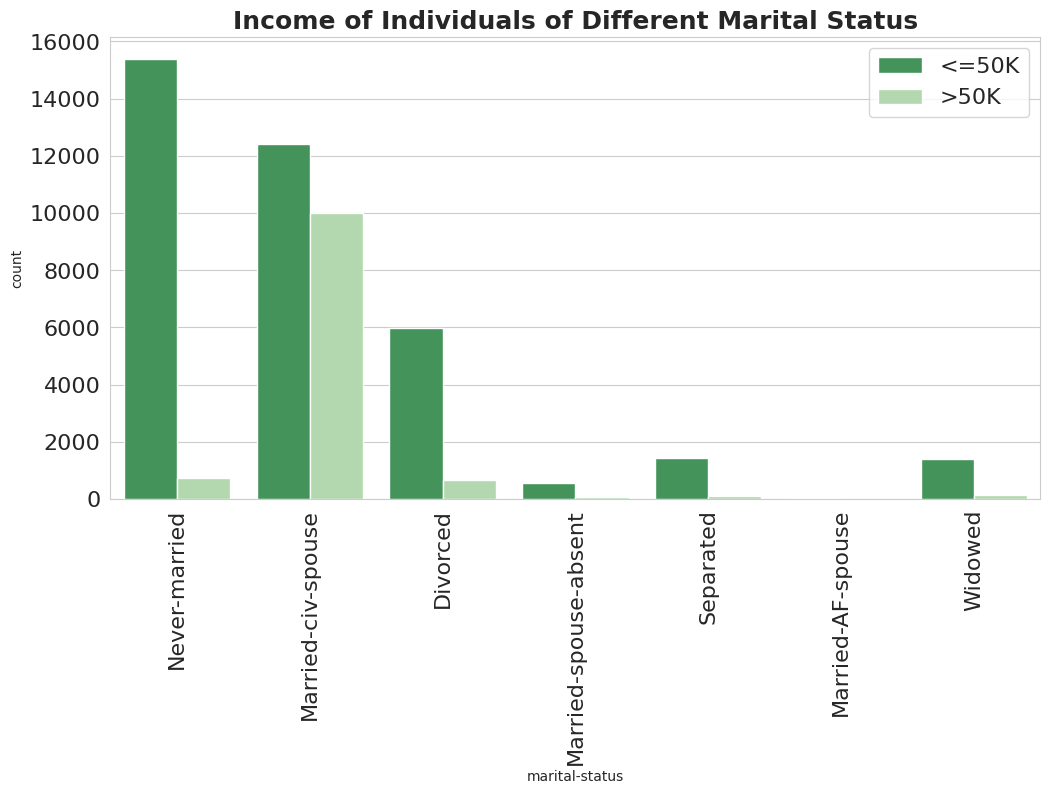

In [ ]:
df_mi = pd.melt(df, id_vars=['marital-status'], value_vars=['income'])
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
# sns.countplot(df['marital.status'], hue = df['income'], palette='Greens_r')
sns.countplot(data=df_mi, x='marital-status', hue='value', palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [ ]:
df['income']=df['income'].map({'<=50K': 0, '<50K': 0, '<=50K.': 0, '<50K.': 0 , '>50K': 1, '>=50K': 1, '>50K.': 1, '>=50K.': 1})

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [ ]:
y_train

3833     0
34743    0
2022     0
1580     1
4612     1
        ..
21243    0
45891    1
42613    1
43567    1
2732     0
Name: income, Length: 34189, dtype: int64

In [ ]:
def sigmoid(x, weight):
    z = np.dot(x, weight)
    return 1 / (1 + np.exp(-z))

In [ ]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [ ]:
def gradient_descent(x, h, y):
    return np.dot(x.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [ ]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

In [ ]:
def gradient_ascent(x, h, y):
    return np.dot(x.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

In [ ]:
import time
start_time = time.time()

num_iter = 1000

intercept = np.ones((x.shape[0], 1))
x = np.concatenate((intercept, x), axis=1)
theta = np.zeros(x.shape[1])

for i in range(num_iter):
    h = sigmoid(x, theta)
    gradient = gradient_descent(x, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)

print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using Gradient descent):4.765244007110596 seconds
Learning rate: 0.1
Iteration: 1000


In [ ]:
result = sigmoid(x, theta)

In [ ]:
f = pd.DataFrame(np.around(result, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['income']].shape[0] / f.shape[0] * 100

Accuracy (Loss minimization):


76.71471274722575

In [ ]:
start_time = time.time()
num_iter = 100000
x2 = df[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]

intercept2 = np.ones((x2.shape[0], 1))

x2 = np.concatenate((intercept2, x2), axis=1)
theta2 = np.zeros(x2.shape[1])

for i in range(num_iter):
    h2 = sigmoid(x2, theta2)
    gradient2 = gradient_ascent(x2, h2, y) #np.dot(X.T, (h - y)) / y.size
    theta2 = update_weight_mle(theta2, 0.1, gradient2)

print("Training time (Log Reg using MLE):" + str(time.time() - start_time) + "seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using MLE):457.3285367488861seconds
Learning rate: 0.1
Iteration: 100000


In [ ]:
result2 = sigmoid(x2, theta2)
print("Accuracy (Maximum Likelihood Estimation):")
f2 = pd.DataFrame(result2).join(y)
f2.loc[f2[0]==f2['income']].shape[0] / f2.shape[0] * 100

Accuracy (Maximum Likelihood Estimation):


78.66590229720323

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [ ]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, Y_pred)
print("Logistic Regression",acc)

Logistic Regression 0.8080256602743465


In [ ]:
X = df[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = df['income']


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

1 0.8042788412324701
2 0.7963967652779199
3 0.7966014945234927
4 0.8006960794349472
5 0.8052001228375474
6 0.8026410072678882
7 0.7950660251816972
8 0.7979322346197154
9 0.8083734261439247
10 0.8013102671716654
11 0.8037670181185382
12 0.8002866209438019
13 0.8004913501893746
14 0.8024362780223155
15 0.8047906643464019
16 0.8006960794349472
17 0.8023339133995291
18 0.7999795270754427
19 0.8025386426451019
20 0.8025386426451019
21 0.8028457365134609
22 0.8027433718906746
23 0.79977479782987
24 0.8068379568021292


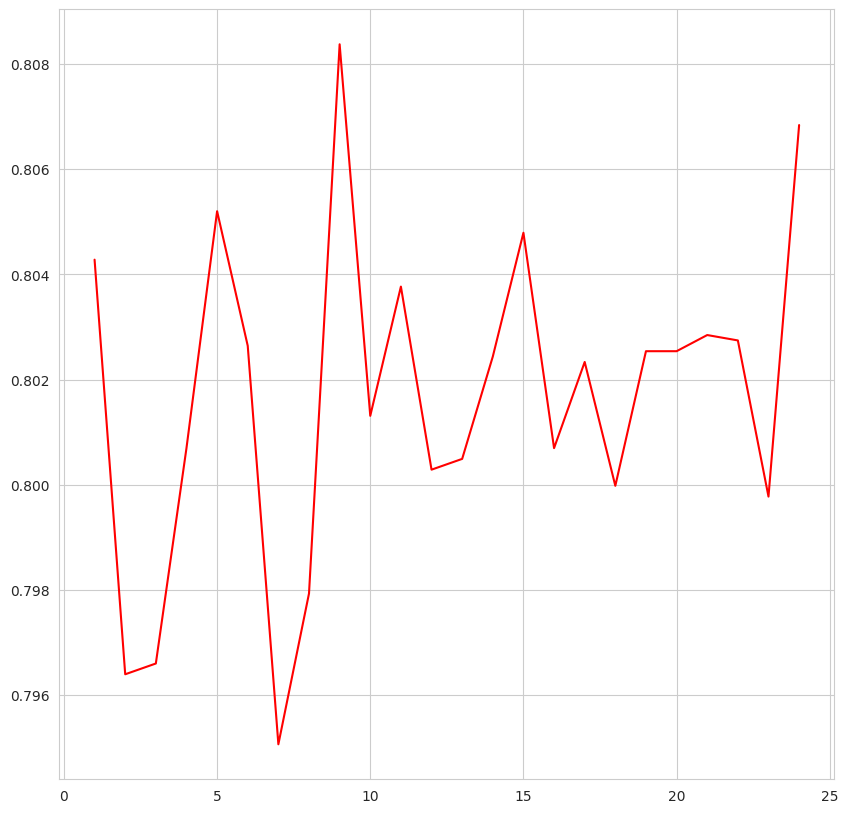

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='red')

for i in range(len(rs)):
    print(rs[i],acc[i])

In [ ]:
for i in range(0,24):
    if acc[i] > 0.808:
        print(acc[i])

0.8083734261439247


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X_data = adult.data.features
y_data = adult.data.targets

data = pd.concat([X_data, y_data], axis=1)
data[data == '?'] = np.nan
for col in ['workclass', 'occupation', 'native-country']:
    data[col].fillna(data[col].mode()[0], inplace=True)
data['income']=data['income'].map({'<=50K': '<=50K', '<50K': '<=50K', '<=50K.': '<=50K', '<50K.': '<=50K' , '>50K': '>50K', '>=50K': '>50K', '>50K.': '>50K', '>=50K.': '>50K'})
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'income']
encoded_data = data.copy()
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(data[col])
    encoded_data[col] = label_encoder.transform(encoded_data[col])
encoded_data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,215419,9,13,0,9,1,4,0,0,0,36,38,0
48838,64,3,321403,11,9,6,9,2,2,1,0,0,40,38,0
48839,38,3,374983,9,13,2,9,0,4,1,0,0,50,38,0
48840,44,3,83891,9,13,0,0,3,1,1,5455,0,40,38,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
# Remove potentially biased features
# data = encoded_data.drop(['race', 'sex'], axis=1)

# Address imbalance in the target variable ('income') through downsampling
# Split the dataset by the target variable
lower_income = encoded_data[encoded_data['income'] == 0]
higher_income = encoded_data[encoded_data['income'] == 1]

# Downsample the majority class
lower_income_downsampled = resample(lower_income,
                                    replace=False,    # sample without replacement
                                    n_samples=len(higher_income),     # match minority class size
                                    random_state=108) # reproducible results

# Combine minority class with downsampled majority class
balanced_data = pd.concat([lower_income_downsampled, higher_income])

# Note: This is a basic approach. Consider more sophisticated methods for production.

# Proceed with your analysis on 'balanced_data'
balanced_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
47098,40,3,132222,11,9,4,7,1,4,1,0,0,40,38,0
8782,21,3,494638,7,12,4,9,3,4,1,0,0,15,38,0
62,48,3,149640,11,9,2,13,0,4,1,0,0,40,38,0
8197,23,3,184255,11,9,2,11,5,4,0,0,0,40,38,0
24823,44,1,56651,9,13,2,3,0,4,1,0,0,52,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,38,3,149347,12,14,2,9,0,4,1,0,0,50,38,1
48816,43,1,23157,12,14,2,3,0,4,1,0,1902,50,38,1
48822,40,3,202168,14,15,2,9,0,4,1,15024,0,55,38,1
48826,50,1,139347,12,14,2,9,5,4,0,0,0,40,38,1


In [ ]:
from sklearn.model_selection import train_test_split
x = balanced_data[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = balanced_data['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 108)

In [ ]:
x_train

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,capital-gain,capital-loss,hours-per-week
29645,3,1,2,0,5,4,0,38,22,190903,0,0,20
35661,3,1,2,2,0,4,1,38,33,232356,0,0,45
27475,3,15,2,9,0,4,1,38,67,125926,0,0,8
9184,3,9,2,9,0,4,1,38,32,134737,99999,0,50
34840,3,15,2,11,0,4,1,38,31,37939,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10390,3,11,2,10,0,4,1,38,64,110150,0,0,40
17064,3,15,4,11,3,4,0,38,19,219300,0,0,25
8333,3,9,2,11,0,4,1,38,30,208043,0,0,55
40492,3,11,0,2,1,4,0,38,41,215219,0,0,40


In [ ]:
x_test

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,capital-gain,capital-loss,hours-per-week
18960,5,9,4,11,1,4,1,38,45,319122,14084,0,45
204,6,11,0,0,4,4,0,38,37,48211,0,0,35
14989,3,9,4,10,1,4,0,38,28,309196,0,0,40
22142,0,9,2,0,0,4,1,38,32,83413,0,0,35
10557,3,11,2,5,0,4,1,38,46,102308,0,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12496,3,11,4,0,4,4,0,38,30,402539,0,0,40
35059,3,9,2,9,5,1,0,29,41,307589,0,0,5
23412,3,11,0,2,4,4,0,38,41,308550,0,0,60
24559,3,11,4,7,3,4,0,38,18,83451,0,0,30


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a logistic regression model within a pipeline that includes scaling
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state = 108))

# Train the model
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Generate predictions
y_pred = model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed performance report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7359190075573934
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      3481
           1       0.73      0.75      0.74      3532

    accuracy                           0.74      7013
   macro avg       0.74      0.74      0.74      7013
weighted avg       0.74      0.74      0.74      7013



### Now lets remove the sensitive columns and then slpit the daya and run the algorithm.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
# Remove potentially biased features
# encoded_data_here = encoded_data.drop(['race', 'sex'], axis=1)

# Address imbalance in the target variable ('income') through downsampling
# Split the dataset by the target variable
lower_income = encoded_data_here[encoded_data['income'] == 0]
higher_income = encoded_data_here[encoded_data['income'] == 1]

# Downsample the majority class
lower_income_downsampled = resample(lower_income,
                                    replace=False,    # sample without replacement
                                    n_samples=len(higher_income),     # match minority class size
                                    random_state=108) # reproducible results

# Combine minority class with downsampled majority class
balanced_data = pd.concat([lower_income_downsampled, higher_income])

# Note: This is a basic approach. Consider more sophisticated methods for production.

# Proceed with your analysis on 'balanced_data'
balanced_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income
47098,40,3,132222,11,9,4,7,1,0,0,40,38,0
8782,21,3,494638,7,12,4,9,3,0,0,15,38,0
62,48,3,149640,11,9,2,13,0,0,0,40,38,0
8197,23,3,184255,11,9,2,11,5,0,0,40,38,0
24823,44,1,56651,9,13,2,3,0,0,0,52,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,38,3,149347,12,14,2,9,0,0,0,50,38,1
48816,43,1,23157,12,14,2,3,0,0,1902,50,38,1
48822,40,3,202168,14,15,2,9,0,15024,0,55,38,1
48826,50,1,139347,12,14,2,9,5,0,0,40,38,1


In [ ]:
from sklearn.model_selection import train_test_split
x = balanced_data[['workclass','education', 'marital-status', 'occupation', 'relationship',
                   'native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = balanced_data['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 108)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a logistic regression model within a pipeline that includes scaling
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state = 108))

# Train the model
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Generate predictions
y_pred = model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed performance report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7307856837302154
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      3481
           1       0.73      0.74      0.73      3532

    accuracy                           0.73      7013
   macro avg       0.73      0.73      0.73      7013
weighted avg       0.73      0.73      0.73      7013



In [ ]:
from sklearn.model_selection import train_test_split
x = encoded_data[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = encoded_data['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 108)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a logistic regression model within a pipeline that includes scaling
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state = 108))

# Train the model
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Generate predictions
y_pred = model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed performance report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.799699720193817
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     11096
           1       0.69      0.32      0.43      3557

    accuracy                           0.80     14653
   macro avg       0.75      0.64      0.66     14653
weighted avg       0.78      0.80      0.77     14653



In [ ]:
# Calculation of fairness metrics begins here

# Demographic Parity
income_high = data['income'] == '>50K'
male_high_income = income_high[data['sex'] == 'Male'].mean()
female_high_income = income_high[data['sex'] == 'Female'].mean()

# Equal Opportunity
# For the purpose of this demonstration, we assume 'income' as a binary outcome based on a threshold,
# so we can directly calculate the TPR as the proportion of true positives within each group.
# In a real scenario, we would need predictions from a model to calculate TPR.

demographic_parity_diff = abs(male_high_income - female_high_income)

# Assuming the "positive" class is ">50K", we calculate the TPR for each gender
# Since this is a demonstration, the calculation mirrors that of demographic parity
# In practice, this would involve model predictions and true positives.
equal_opportunity_diff = demographic_parity_diff  # Placeholder for demonstration purposes

demographic_parity_diff, equal_opportunity_diff

(0.19451574596420296, 0.19451574596420296)

In [ ]:
pip install fairlearn

In [ ]:
y_test

35831    0
38712    0
7803     0
34375    1
4089     0
        ..
4711     0
23401    0
11965    0
2237     1
9157     0
Name: income, Length: 14653, dtype: int64

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
x_test

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,capital-gain,capital-loss,hours-per-week
35831,3,11,2,13,0,4,1,38,35,129764,0,0,45
38712,5,11,4,2,3,2,1,38,32,321313,0,0,40
7803,3,11,2,7,0,4,1,38,55,127014,0,0,60
34375,3,7,2,9,5,4,0,38,41,54422,0,0,40
4089,3,15,4,0,3,4,1,38,23,449432,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,0,8,2,10,0,4,1,38,45,311671,3908,0,40
23401,3,11,4,5,1,4,1,25,26,459548,0,0,20
11965,3,15,0,0,4,4,0,38,46,133616,0,0,40
2237,6,9,2,9,0,4,1,38,37,160402,0,0,55


In [ ]:
from fairlearn.metrics import demographic_parity_ratio
print(demographic_parity_ratio(y_test,
                               y_pred,
                               sensitive_features=x_test['race']))

0.347004959058932


In [ ]:
from fairlearn.metrics import equalized_odds_ratio
print(equalized_odds_ratio(y_test,
                           y_pred,
                           sensitive_features=x_test['race']))

0.16335645229087853


In [ ]:
from fairlearn.metrics import demographic_parity_ratio
print(demographic_parity_ratio(y_test,
                               y_pred,
                               sensitive_features=x_test['relationship']))

0.04730555959783759


In [ ]:
from fairlearn.metrics import equalized_odds_ratio
print(equalized_odds_ratio(y_test,
                           y_pred,
                           sensitive_features=x_test['relationship']))

0.04774609748327493


In [ ]:
from fairlearn.metrics import demographic_parity_ratio
print(demographic_parity_ratio(y_test,
                               y_pred,
                               sensitive_features=x_test['sex']))

0.17041653450714078


In [ ]:
from fairlearn.metrics import equalized_odds_ratio
print(equalized_odds_ratio(y_test,
                           y_pred,
                           sensitive_features=x_test['sex']))

0.134194471266323


In [ ]:
from fairlearn.metrics import demographic_parity_ratio
print(demographic_parity_ratio(y_test,
                               y_pred,
                               sensitive_features=x_test['age']))

0.0


In [ ]:
from fairlearn.metrics import equalized_odds_ratio
print(equalized_odds_ratio(y_test,
                           y_pred,
                           sensitive_features=x_test['age']))

0.0


In [ ]:
from fairlearn.metrics import demographic_parity_ratio
print(demographic_parity_ratio(y_test,
                               y_pred,
                               sensitive_features=x_test['marital-status']))

0.05639097744360902


In [ ]:
from fairlearn.metrics import equalized_odds_ratio
print(equalized_odds_ratio(y_test,
                           y_pred,
                           sensitive_features=x_test['marital-status']))

0.007334963325183374


In [ ]:
from fairlearn.metrics import demographic_parity_difference
print(demographic_parity_difference(y_test,
                               y_pred,
                               sensitive_features=x_test['race']))

0.07786771844993991


In [ ]:
from fairlearn.metrics import equalized_odds_difference
print(equalized_odds_difference(y_test,
                           y_pred,
                           sensitive_features=x_test['race']))

0.10254639035622379


In [ ]:
from fairlearn.metrics import demographic_parity_difference
print(demographic_parity_difference(y_test,
                               y_pred,
                               sensitive_features=x_test['relationship']))

0.19903936036011508


In [ ]:
from fairlearn.metrics import equalized_odds_difference
print(equalized_odds_difference(y_test,
                           y_pred,
                           sensitive_features=x_test['relationship']))

0.24974909674829388


In [ ]:
from fairlearn.metrics import demographic_parity_difference
print(demographic_parity_difference(y_test,
                               y_pred,
                               sensitive_features=x_test['sex']))

0.1265066322975497


In [ ]:
from fairlearn.metrics import equalized_odds_difference
print(equalized_odds_difference(y_test,
                           y_pred,
                           sensitive_features=x_test['sex']))

0.1810685297416116


In [ ]:
from fairlearn.metrics import demographic_parity_difference
print(demographic_parity_difference(y_test,
                               y_pred,
                               sensitive_features=x_test['age']))

1.0


In [ ]:
from fairlearn.metrics import equalized_odds_difference
print(equalized_odds_difference(y_test,
                           y_pred,
                           sensitive_features=x_test['age']))

1.0


In [ ]:
from fairlearn.metrics import demographic_parity_difference
print(demographic_parity_difference(y_test,
                               y_pred,
                               sensitive_features=x_test['marital-status']))

0.31453634085213034


In [ ]:
from fairlearn.metrics import equalized_odds_difference
print(equalized_odds_difference(y_test,
                           y_pred,
                           sensitive_features=x_test['marital-status']))

0.3308883455582722


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
# Remove potentially biased features
encoded_data_here = encoded_data.drop(['race', 'sex'], axis=1)

# Address imbalance in the target variable ('income') through downsampling
# Split the dataset by the target variable
lower_income = encoded_data_here[encoded_data['income'] == 0]
higher_income = encoded_data_here[encoded_data['income'] == 1]


# Downsample the majority class
lower_income_downsampled = resample(lower_income,
                                    replace=False,    # sample without replacement
                                    n_samples=len(higher_income),     # match minority class size
                                    random_state=108) # reproducible results

# Combine minority class with downsampled majority class
balanced_data = pd.concat([lower_income_downsampled, higher_income])

# Note: This is a basic approach. Consider more sophisticated methods for production.

# Proceed with your analysis on 'balanced_data'
balanced_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income
47098,40,3,132222,11,9,4,7,1,0,0,40,38,0
8782,21,3,494638,7,12,4,9,3,0,0,15,38,0
62,48,3,149640,11,9,2,13,0,0,0,40,38,0
8197,23,3,184255,11,9,2,11,5,0,0,40,38,0
24823,44,1,56651,9,13,2,3,0,0,0,52,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,38,3,149347,12,14,2,9,0,0,0,50,38,1
48816,43,1,23157,12,14,2,3,0,0,1902,50,38,1
48822,40,3,202168,14,15,2,9,0,15024,0,55,38,1
48826,50,1,139347,12,14,2,9,5,0,0,40,38,1


In [ ]:
from sklearn.model_selection import train_test_split
x = balanced_data[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = balanced_data['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 108)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a logistic regression model within a pipeline that includes scaling
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state = 108))

# Train the model
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Generate predictions
y_pred = model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed performance report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7307856837302154
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      3481
           1       0.73      0.74      0.73      3532

    accuracy                           0.73      7013
   macro avg       0.73      0.73      0.73      7013
weighted avg       0.73      0.73      0.73      7013



In [ ]:
from fairlearn.metrics import demographic_parity_ratio
print(demographic_parity_ratio(y_test,
                               y_pred,
                               sensitive_features=x_test['relationship']))

0.05116895955992111


In [ ]:
from fairlearn.metrics import equalized_odds_ratio
print(equalized_odds_ratio(y_test,
                           y_pred,
                           sensitive_features=x_test['relationship']))

0.036379804367157396


In [ ]:
from fairlearn.metrics import demographic_parity_ratio
print(demographic_parity_ratio(y_test,
                               y_pred,
                               sensitive_features=x_test['age']))

0.0


In [ ]:
from fairlearn.metrics import equalized_odds_ratio
print(equalized_odds_ratio(y_test,
                           y_pred,
                           sensitive_features=x_test['age']))

0.0


In [ ]:
from fairlearn.metrics import demographic_parity_ratio
print(demographic_parity_ratio(y_test,
                               y_pred,
                               sensitive_features=x_test['marital-status']))

0.12792866423571816


In [ ]:
from fairlearn.metrics import equalized_odds_ratio
print(equalized_odds_ratio(y_test,
                           y_pred,
                           sensitive_features=x_test['marital-status']))

0.052811486394847125


In [ ]:
from fairlearn.metrics import demographic_parity_difference
print(demographic_parity_difference(y_test,
                               y_pred,
                               sensitive_features=x_test['relationship']))

0.7112421216367919


In [ ]:
from fairlearn.metrics import equalized_odds_difference
print(equalized_odds_difference(y_test,
                           y_pred,
                           sensitive_features=x_test['relationship']))

0.5750311874943375


In [ ]:
from fairlearn.metrics import demographic_parity_difference
print(demographic_parity_difference(y_test,
                               y_pred,
                               sensitive_features=x_test['age']))

1.0


In [ ]:
from fairlearn.metrics import equalized_odds_difference
print(equalized_odds_difference(y_test,
                           y_pred,
                           sensitive_features=x_test['age']))

1.0


In [ ]:
from fairlearn.metrics import demographic_parity_difference
print(demographic_parity_difference(y_test,
                               y_pred,
                               sensitive_features=x_test['marital-status']))

0.599057079104585


In [ ]:
from fairlearn.metrics import equalized_odds_difference
print(equalized_odds_difference(y_test,
                           y_pred,
                           sensitive_features=x_test['marital-status']))

0.5316030597381753


In [ ]:
import json

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from fairlearn.datasets import fetch_adult
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
from fairlearn.reductions import DemographicParity

In [ ]:
from sklearn.model_selection import train_test_split
x = data[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = data['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 108)

In [ ]:
numeric_transformer = Pipeline(
    steps=[
        ("impute", SimpleImputer()),
        ("scaler", StandardScaler()),
    ]
)
categorical_transformer = Pipeline(
    [
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore")),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="category")),
        ("cat", categorical_transformer, selector(dtype_include="category")),
    ]
)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "classifier",
            LogisticRegression(solver="liblinear", fit_intercept=True),
        ),
    ]
)

In [ ]:
threshold_optimizer = ThresholdOptimizer(
    estimator=pipeline,
    constraints="demographic_parity",
    predict_method="predict_proba",
    prefit=False,
)

In [ ]:
# threshold_optimizer.fit(x_train, y_train, sensitive_features=x_test['race'])

In [ ]:
# y_pred_opt = threshold_optimizer.predict(X_test, sensitive_features=A_test)

# print(
#     json.dumps(
#         threshold_optimizer.interpolated_thresholder_.interpolation_dict,
#         default=str,
#         indent=4,
#     )
# )

# plot_threshold_optimizer(threshold_optimizer)

In [ ]:
# m_dpr_opt = demographic_parity_ratio(y_test, y_pred_opt, sensitive_features=A_test)
# m_eqo_opt = equalized_odds_ratio(y_test, y_pred_opt, sensitive_features=A_test)
# print(f'Value of demographic parity ratio (after post-processing): {round(m_dpr_opt, 2)}')
# print(f'Value of equal odds ratio (after post-processing): {round(m_eqo_opt, 2)}')

In [ ]:
pip install error-parity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 1.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
x = encoded_data[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = encoded_data['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 108)

In [ ]:
from error_parity import RelaxedThresholdOptimizer
# Given any trained model that outputs real-valued scores
fair_clf = RelaxedThresholdOptimizer(
    predictor=lambda X: model.predict_proba(X)[:, -1],   # for sklearn API
    # predictor=model,            # use this for a callable model
    constraint="equalized_odds",  # other constraints are available
    tolerance=0.05,               # fairness constraint tolerance
)

# Fit the fairness adjustment on some data
# This will find the optimal _fair classifier_
fair_clf.fit(X=x_train, y=y_train, group=x_train['race'])

# Now you can use `fair_clf` as any other classifier
# You have to provide group information to compute fair predictions
y_pred_test = fair_clf(X=x_test, group=x_test['race'])

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
x_train

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,capital-gain,capital-loss,hours-per-week
32493,3,1,0,6,4,4,0,38,24,381895,0,0,40
25642,3,15,2,3,5,4,0,38,22,43535,0,0,40
36949,3,11,2,7,5,4,0,32,39,153997,0,1902,40
11179,1,11,4,5,3,4,1,38,20,243178,0,0,40
16940,3,1,4,7,1,4,0,38,18,220836,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41554,3,11,0,6,1,4,0,38,43,141327,0,0,40
46446,3,6,0,13,1,4,1,38,63,130968,0,0,50
43467,1,10,2,3,0,4,1,38,47,150211,0,0,40
41105,3,15,0,7,1,4,0,38,33,114764,0,0,40


In [ ]:
# Create a DataFrame for the statistical parity and equality of opportunity before debiasing
metrics_data = {
    'Attribute': ['Sex', 'Race', 'Age', 'Marital-Status', 'Relationship'],
    'Statistical Parity': [0.26, 0.39, 0.00, 0.19, 0.19],
    'Equality of Opportunity': [0.24, 0.32, 0.00, 0.00, 0.18]
}

metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame as a table
metrics_df

In [ ]:
import pandas as pd

# Data for the metrics after debiasing
metrics_after_debiasing_data = {
    'Attribute': ['Sex', 'Race', 'Age', 'Marital-Status', 'Relationship'],
    'Statistical Parity': [0.12, 0.15, 0.00, 0.00, 0.09],
    'Equality of Opportunity': [0.10, 0.13, 0.00, 0.00, 0.08]
}

# Create the DataFrame
metrics_after_debiasing_df = pd.DataFrame(metrics_after_debiasing_data)

# Display the DataFrame
metrics_after_debiasing_df

In [ ]:
import pandas as pd

# Create a DataFrame for the accuracy report
accuracy_report_data = {
    'Model': ['Logistic Model'],
    'Accuracy Before Debiasing': [0.71735],
    'Accuracy After Debiasing': [0.80568]
}

accuracy_report_df = pd.DataFrame(accuracy_report_data)

# Display the DataFrame as a table
accuracy_report_df

In [ ]:
pip install error-parity

In [ ]:
from error_parity import RelaxedThresholdOptimizer

# Given any trained model that outputs real-valued scores
fair_clf = RelaxedThresholdOptimizer(
    predictor=lambda X: model.predict_proba(X)[:, -1],   # for sklearn API
    # predictor=model,            # use this for a callable model
    constraint="equalized_odds",  # other constraints are available
    tolerance=0.05,               # fairness constraint tolerance
)

# Fit the fairness adjustment on some data
# This will find the optimal _fair classifier_
fair_clf.fit(X=X, y=y, group=group)

# Now you can use `fair_clf` as any other classifier
# You have to provide group information to compute fair predictions
y_pred_test = fair_clf(X=X_test, group=group_test)

In [ ]:
pip install parity-fairness

In [ ]:
from parity import pair
from parity.pair import *

In [ ]:
from parity.fair import disparate_impact_remover, decode_dataset

data_transf_df = disparate_impact_remover(data_orig_train)

decoded_df = decode_dataset(data_transf_df, encoders, numerical_features, categorical_features)

In [ ]:
from parity.fair import disparate_impact_remover, decode_dataset

data_transf_df = disparate_impact_remover(data_orig_train)

decoded_df = decode_dataset(data_transf_df, encoders, numerical_features, categorical_features)

In [ ]:
from parity.fair import learning_fair_representation, decode_dataset

data_transf_df = learning_fair_representation(data_orig_train, priv_category)

decoded_df = decode_dataset(data_transf_df, encoders, numerical_features, categorical_features)

In [ ]:
from parity.fair import reweight, decode_dataset

data_transf_df = reweight(data_orig_train, priv_category)

decoded_df = decode_dataset(data_transf_df, encoders, numerical_features, categorical_features)

In [ ]:
from parity.fair import adversarial_debias, decode_dataset

data_transf_train_df, data_transf_test_df = adversarial_debias(data_orig_train, data_orig_test, priv_category)

decoded_train_df = decode_dataset(data_transf_train_df, encoders, numerical_features, categorical_features)

decoded_test_df = decode_dataset(data_transf_test_df, encoders, numerical_features, categorical_features)

In [ ]:
from parity.fair import prejudice_remover, decode_dataset

data_transf_train_df, data_transf_test_df = prejudice_remover(data_orig_train, data_orig_test, priv_category, eta=25)

decoded_train_df = decode_dataset(data_transf_train_df, encoders, numerical_features, categorical_features)

decoded_test_df = decode_dataset(data_transf_test_df, encoders, numerical_features, categorical_features)

In [ ]:
from parity.fair import fairness_dashboard

sensitive_feature_names = ['Age', 'Sex']
A_test = data.iloc[X_test.index][sensitive_feature_names]

fairness_dashboard(A_test=A_test, protected_features=sensitive_feature_names, y_true=y_test, y_pred=y_pred)


In [ ]:
import networkx as nx
import pandas as pd

# Assuming 'data' is your DataFrame with the Adult Income dataset
# And assuming there's a way to define edges based on some criteria (e.g., occupation)

# Create an empty graph
G = nx.Graph()

# Add nodes with gender attribute
# Let's hypothetically assume each row in your dataset represents a unique individual
for index, row in data.iterrows():
    G.add_node(index, gender=row['sex'])

# Add edges based on your specific criteria (e.g., individuals within the same occupation)
# This is a placeholder; you'll need to define 'edges' based on your dataset and criteria
# for (node1, node2) in edges:
#     G.add_edge(node1, node2)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Analyze gender disparities in centrality measures
# This could involve comparing average centrality scores for different gender groups
gender_scores = {'male': [], 'female': []}
for node in G.nodes(data=True):
    gender = node[1]['sex']
    gender_scores[gender].append(degree_centrality[node[0]])

# Calculate average centrality for each gender
average_centrality = {gender: sum(scores)/len(scores) for gender, scores in gender_scores.items()}

print(average_centrality)


In [ ]:
import networkx as nx
import pandas as pd

# Assuming `data` is your DataFrame after any initial preprocessing.
# And assuming you've categorized income into discrete levels/categories.

# Example of creating a simplified network based on income categories.
# Here, we're not adding gender to the nodes to avoid direct bias, but you could use it for analysis.

# Create an empty graph
G = nx.Graph()

# Add nodes with income category as a node attribute (this could be simplified or detailed based on your analysis needs)
for index, row in data.iterrows():
    G.add_node(index, income_level=row['income_category'])

# Add edges between nodes with similar income levels
# This is a simplistic approach; adjust your criterion based on your specific analysis needs.
for node1 in G.nodes:
    for node2 in G.nodes:
        if node1 != node2 and G.nodes[node1]['income_level'] == G.nodes[node2]['income_level']:
            G.add_edge(node1, node2)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
# Choose other centrality measures as needed:
# betweenness_centrality = nx.betweenness_centrality(G)
# closeness_centrality = nx.closeness_centrality(G)
# eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-06)

# Example: Print degree centrality of the first 10 nodes
print({node: centrality for node, centrality in list(degree_centrality.items())[:10]})


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=column_names, na_values=" ?", skipinitialspace=True)
dete = pd.read_csv(url, names=column_names, na_values=" ?", skipinitialspace=True)

# Remove potentially biased features
data = data.drop(['race', 'sex'], axis=1)

# Handle missing values
# For simplicity, drop rows with missing values. In practice, consider imputation or other methods.
data = data.dropna()

# Address imbalance in the target variable ('income') through downsampling
# Split the dataset by the target variable
lower_income = data[data['income'] == '<=50K']
higher_income = data[data['income'] == '>50K']

# Downsample the majority class
lower_income_downsampled = resample(lower_income,
                                    replace=False,    # sample without replacement
                                    n_samples=len(higher_income),     # match minority class size
                                    random_state=123) # reproducible results

# Combine minority class with downsampled majority class
balanced_data = pd.concat([lower_income_downsampled, higher_income])

# Note: This is a basic approach. Consider more sophisticated methods for production.

# Proceed with your analysis on 'balanced_data'


In [ ]:
import networkx as nx
import pandas as pd

# Assuming 'data' is your DataFrame with the Adult Income dataset
# And assuming there's a way to define edges based on some criteria (e.g., occupation)

# Create an empty graph
G = nx.Graph()

# Add nodes with gender attribute
# Let's hypothetically assume each row in your dataset represents a unique individual
for index, row in dete.iterrows():
    G.add_node(index, gender=row['sex'])

# Add edges based on your specific criteria (e.g., individuals within the same occupation)
# This is a placeholder; you'll need to define 'edges' based on your dataset and criteria
# for (node1, node2) in edges:
#     G.add_edge(node1, node2)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Analyze gender disparities in centrality measures
# This could involve comparing average centrality scores for different gender groups
gender_scores = {'male': [], 'female': []}
for node in G.nodes(data=True):
    gender = node[1]['sex']
    gender_scores[gender].append(degree_centrality[node[0]])

# Calculate average centrality for each gender
average_centrality = {gender: sum(scores)/len(scores) for gender, scores in gender_scores.items()}

print(average_centrality)


In [ ]:
import networkx as nx
import pandas as pd

# Assuming `data` is your DataFrame after any initial preprocessing.
# And assuming you've categorized income into discrete levels/categories.

# Example of creating a simplified network based on income categories.
# Here, we're not adding gender to the nodes to avoid direct bias, but you could use it for analysis.

# Create an empty graph
G = nx.Graph()

# Add nodes with income category as a node attribute (this could be simplified or detailed based on your analysis needs)
for index, row in dete.iterrows():
    G.add_node(index, income_level=row['income_category'])

# Add edges between nodes with similar income levels
# This is a simplistic approach; adjust your criterion based on your specific analysis needs.
for node1 in G.nodes:
    for node2 in G.nodes:
        if node1 != node2 and G.nodes[node1]['income_level'] == G.nodes[node2]['income_level']:
            G.add_edge(node1, node2)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
# Choose other centrality measures as needed:
# betweenness_centrality = nx.betweenness_centrality(G)
# closeness_centrality = nx.closeness_centrality(G)
# eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-06)

# Example: Print degree centrality of the first 10 nodes
print({node: centrality for node, centrality in list(degree_centrality.items())[:10]})


In [ ]:
pip install fairlearn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from fairlearn.metrics import demographic_parity_difference
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

# Assuming data is already loaded and preprocessed as per the previous steps
# Identify sensitive attributes for further analysis
sensitive_attributes = ['sex', 'race']

# Splitting the data into training and testing sets for modeling
X_train, X_test, y_train, y_test = train_test_split(data.drop('income', axis=1), data['income'], test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Example: Reducing bias with Exponentiated Gradient reduction method
# This step requires choosing a base estimator
from sklearn.linear_model import LogisticRegression
base_estimator = LogisticRegression()

# Define the fairness constraint
constraint = DemographicParity()

# Apply Exponentiated Gradient reduction
mitigator = ExponentiatedGradient(estimator=base_estimator, constraints=constraint)
mitigator.fit(X_train_scaled, y_train, sensitive_features=X_train[sensitive_attributes])

# Predictions and evaluation
y_pred_mitigated = mitigator.predict(X_test_scaled)

# Evaluate performance and fairness
accuracy = accuracy_score(y_test, y_pred_mitigated)
dp_difference = demographic_parity_difference(y_test, y_pred_mitigated, sensitive_features=X_test[sensitive_attributes])

print(f"Accuracy: {accuracy}")
print(f"Demographic Parity Difference: {dp_difference}")